In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from tensorflow import keras

In [3]:
train_data = pd.read_csv("/content/drive/My Drive/Dataset/train.csv")
data = tf.keras.datasets.mnist
(train_image,train_label), (test_image, test_label) = data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
class_name = ["0","1","2","3","4","5","6","7","8","9"]

In [5]:
train_image.shape #28x28 pixels

(60000, 28, 28)

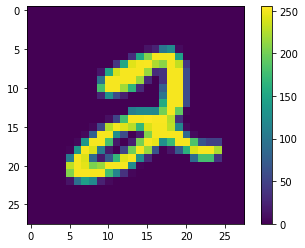

In [6]:
plt.figure()
plt.imshow(train_image[5])
plt.colorbar()
plt.grid(False)
plt.show()

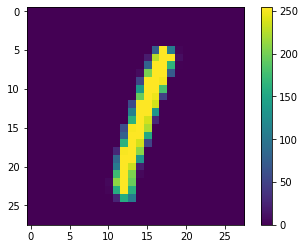

In [7]:
plt.figure()
plt.imshow(test_image[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
#Build model

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10))



In [9]:
#compile model

model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [10]:
model.fit(train_image,train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.5533 - accuracy: 0.8588
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3722 - accuracy: 0.9068
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2890 - accuracy: 0.9243
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2520 - accuracy: 0.9330
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2296 - accuracy: 0.9399
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2088 - accuracy: 0.9465
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2027 - accuracy: 0.9474
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1954 - accuracy: 0.9507
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1854 - accuracy: 0.9522
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.175

In [11]:
test_loss, test_accuracy = model.evaluate(test_image, test_label, verbose = 2)
print("Test Accuracy is: ", test_accuracy)

313/313 - 0s - loss: 0.2812 - accuracy: 0.9450
Test Accuracy is:  0.9449999928474426


In [12]:
prob_model = tf.keras.models.Sequential([model, tf.keras.layers.Softmax()])

prediction = prob_model.predict(test_image)

In [13]:
for i in range(10):
  print("Label: {} - Predicted: {} / Actual: {}".format(i, np.argmax(prediction[i]), test_label[i]))

Label: 0 - Predicted: 7 / Actual: 7
Label: 1 - Predicted: 2 / Actual: 2
Label: 2 - Predicted: 1 / Actual: 1
Label: 3 - Predicted: 0 / Actual: 0
Label: 4 - Predicted: 4 / Actual: 4
Label: 5 - Predicted: 1 / Actual: 1
Label: 6 - Predicted: 4 / Actual: 4
Label: 7 - Predicted: 9 / Actual: 9
Label: 8 - Predicted: 5 / Actual: 5
Label: 9 - Predicted: 9 / Actual: 9


In [20]:
def plot_image(i, predicted_array, true_label, img):
  predicted_array, true_label, img = predicted_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicted_array)

  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"

  plt.xlabel("{} ({})".format(class_name[predicted_label],
                                        class_name[true_label]),
                                        color=color)
  
def plot_value_array(i, predicted_array, true_label):
  predicted_array, true_label = predicted_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  plot = plt.bar(range(10), predicted_array, color="red")
  plt.ylim([0,1])
  predicted_label = np.argmax(predicted_array)

  plot[predicted_label].set_color("red")
  plot[true_label].set_color("blue")



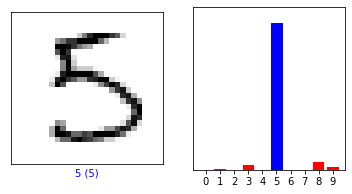

In [22]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i], test_label)
plt.show()